# Four wave mixing simulation

In [61]:
import numpy as np

# Conservation of energy
$$
2 \omega_{p} = \omega_{s} + \omega_{i}
$$

$\omega_{s}$ is the signal frequency which corresponds to the shorter wavelength photon produced in four wave mixing.  
$\omega_{i}$ is the idler frequency which corresponds to the longer wavelength photon produced in four wave mixing process.  
$\omega_{p}$ is the pump frequency

# Conservation of momentum
$$
2\beta(\omega_{p}) = \beta(\omega_{s}) + \beta(\omega_{i}) + 2\gamma P
$$
Subtracting all onto one side gives
$$
2\beta(\omega_{p}) - \beta(\omega_{s}) - \beta(\omega_{i}) - 2\gamma P = 0
$$

$\gamma$ is approximately $0.2Wm^{-1}$  and $P$ is approximately equal to $100W$

Mid IR wavelengths range roughly from 2500–25000nm  
This corresponds to frequencies of 1.2*10^13 to 1.2*10^14  
Which corresponds to angular frequencies of 2 $\pi$ * these frequencies

Will be using 1 micron to 1.6 microns for pump wavelength, with 100 points for spacing.  
Signal needs a slightly larger range because the solution we are expecting is steeper in the shorter wavelength range.  
100 by 100 matrices should work fine. Anything bigger than 200 by 200 will be too slow.

In [62]:
import RefractiveIndexClass

In [63]:
# Function to convert wavelength to angular frequency
def lambda_to_ang_freq(wavelength_matrix):
    #return (2*np.pi*3e8*RefractiveIndexClass.RefractiveIndex.n_fs(wavelength_matrix*1.0e-9,parameter="wavelength")) / wavelength_matrix
    return (2*np.pi*3e8) / wavelength_matrix

In [64]:
# PUMP WAVELENGTH MATRIX

def create_pump_matrix(rows, columns, start_value, step):
    matrix = np.zeros((rows, columns))
    for i in range(columns):
        matrix[:, i] = np.full(rows, start_value + i * step)
    return matrix

# Number of rows and columns, start and end values for the pump wavelengths, and spacing between each column value
rows = 100
columns = 100
start_value = 1e-6 #1 micron in m
end_value = 1.6e-6
step = (end_value - start_value) / columns

pump_wavelength_matrix = create_pump_matrix(rows, columns, start_value, step)

pump_frequency_matrix = lambda_to_ang_freq(pump_wavelength_matrix)

# for i in range(pump_frequency_matrix.shape[0]):
#     for j in range(pump_frequency_matrix.shape[1]):
#         pump_frequency_matrix[i, j] = pump_frequency_matrix[i,j]*RefractiveIndexClass.RefractiveIndex.n_fs(pump_frequency_matrix[i, j],parameter="omega")

#print(pump_frequency_matrix)

pump_wavelength_matrix

array([[1.000e-06, 1.006e-06, 1.012e-06, ..., 1.582e-06, 1.588e-06,
        1.594e-06],
       [1.000e-06, 1.006e-06, 1.012e-06, ..., 1.582e-06, 1.588e-06,
        1.594e-06],
       [1.000e-06, 1.006e-06, 1.012e-06, ..., 1.582e-06, 1.588e-06,
        1.594e-06],
       ...,
       [1.000e-06, 1.006e-06, 1.012e-06, ..., 1.582e-06, 1.588e-06,
        1.594e-06],
       [1.000e-06, 1.006e-06, 1.012e-06, ..., 1.582e-06, 1.588e-06,
        1.594e-06],
       [1.000e-06, 1.006e-06, 1.012e-06, ..., 1.582e-06, 1.588e-06,
        1.594e-06]])

In [65]:
#SIGNAL WAVELENGTH MATRIX

def create_matrix(rows, columns, min_value, max_value):
    matrix = np.zeros((rows, columns))
    for i in range(columns):
        matrix[:, i] = np.linspace(min_value, max_value, rows)
    return matrix

# Example usage
rows = 100
columns = 100
min_value = 1.0e-6
max_value = 1.6e-6

signal_wavelength_matrix = create_matrix(rows, columns, min_value, max_value)
signal_frequency_matrix = lambda_to_ang_freq(signal_wavelength_matrix)

# for i in range(signal_frequency_matrix.shape[0]):
#     for j in range(signal_frequency_matrix.shape[1]):
#         signal_frequency_matrix[i, j] = signal_frequency_matrix[i,j]*RefractiveIndexClass.RefractiveIndex.n_fs(signal_frequency_matrix[i, j],parameter="omega")

print(signal_wavelength_matrix)

[[1.00000000e-06 1.00000000e-06 1.00000000e-06 ... 1.00000000e-06
  1.00000000e-06 1.00000000e-06]
 [1.00606061e-06 1.00606061e-06 1.00606061e-06 ... 1.00606061e-06
  1.00606061e-06 1.00606061e-06]
 [1.01212121e-06 1.01212121e-06 1.01212121e-06 ... 1.01212121e-06
  1.01212121e-06 1.01212121e-06]
 ...
 [1.58787879e-06 1.58787879e-06 1.58787879e-06 ... 1.58787879e-06
  1.58787879e-06 1.58787879e-06]
 [1.59393939e-06 1.59393939e-06 1.59393939e-06 ... 1.59393939e-06
  1.59393939e-06 1.59393939e-06]
 [1.60000000e-06 1.60000000e-06 1.60000000e-06 ... 1.60000000e-06
  1.60000000e-06 1.60000000e-06]]


In [66]:
# CALCULATION TO GET IDLER WAVELENGTH MATRIX

#idler_wavelength_matrix = 2*pump_wavelength_matrix - signal_wavelength_matrix #Using cons of energy equation

idler_frequency_matrix = 2*pump_frequency_matrix - signal_frequency_matrix

# for i in range(idler_frequency_matrix.shape[0]):
#     for j in range(idler_frequency_matrix.shape[1]):
#         idler_frequency_matrix[i, j] = idler_frequency_matrix[i,j]*RefractiveIndexClass.RefractiveIndex.n_fs(idler_frequency_matrix[i, j],parameter="omega")

idler_frequency_matrix

array([[1.88495559e+15, 1.86247103e+15, 1.84025309e+15, ...,
        4.98047685e+14, 4.89043894e+14, 4.80107886e+14],
       [1.89631075e+15, 1.87382619e+15, 1.85160824e+15, ...,
        5.09402839e+14, 5.00399048e+14, 4.91463040e+14],
       [1.90752991e+15, 1.88504535e+15, 1.86282741e+15, ...,
        5.20622003e+14, 5.11618213e+14, 5.02682205e+14],
       ...,
       [2.58282083e+15, 2.56033627e+15, 2.53811833e+15, ...,
        1.19591292e+15, 1.18690913e+15, 1.17797312e+15],
       [2.58733448e+15, 2.56484992e+15, 2.54263198e+15, ...,
        1.20042657e+15, 1.19142278e+15, 1.18248678e+15],
       [2.59181394e+15, 2.56932938e+15, 2.54711144e+15, ...,
        1.20490603e+15, 1.19590224e+15, 1.18696623e+15]])

## Input all pump and signal and idler frequencies into beta, then calculate matrix of $\Delta\beta$ so we can plot it and see if we get expected shape.

In [67]:
pump_beta = RefractiveIndexClass.RefractiveIndex.n_fs(pump_frequency_matrix,parameter="omega") * pump_frequency_matrix / 3e8
#print(pump_beta)
signal_beta = RefractiveIndexClass.RefractiveIndex.n_fs(signal_frequency_matrix, parameter="omega") * signal_frequency_matrix / 3e8
idler_beta = RefractiveIndexClass.RefractiveIndex.n_fs(idler_frequency_matrix, parameter="omega") * idler_frequency_matrix / 3e8

gamma = 2e-4 #Unit is m^-1 W^-1
P = 100 # W

# Momentum conservation equation
delta_beta = 2*pump_beta - signal_beta - idler_beta - 2*gamma*P
delta_beta

array([[-4.00000000e-02, -2.65532347e+00, -1.01590632e+01, ...,
         3.52109110e+04,  3.71746504e+04,  3.92561106e+04],
       [-2.76428655e+00, -4.02636444e-02, -2.48931512e+00, ...,
         3.29157887e+04,  3.47251471e+04,  3.66391833e+04],
       [-1.08063421e+01, -2.69725088e+00, -4.10079611e-02, ...,
         3.08191232e+04,  3.24915309e+04,  3.42575486e+04],
       ...,
       [-9.28264904e+03, -8.78343671e+03, -8.30562318e+03, ...,
         5.78417564e-01, -3.97329842e-02,  6.51438470e-01],
       [-9.38725912e+03, -8.88379837e+03, -8.40184430e+03, ...,
         2.49162805e+00,  5.96263750e-01, -3.99327352e-02],
       [-9.49125685e+03, -8.98356826e+03, -8.49749351e+03, ...,
         5.67146018e+00,  2.53784439e+00,  6.14297418e-01]])

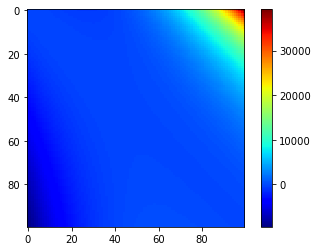

In [68]:
# Plot the heatmap
import matplotlib.pyplot as plt
plt.imshow(delta_beta, cmap='jet', interpolation='nearest')
plt.colorbar()  # Add colorbar to show the scale
plt.show()

Text(0.5, 1.0, 'Phase Matching Plot')

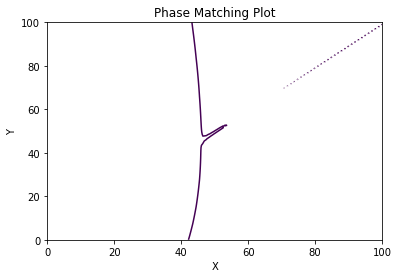

In [69]:
X = np.linspace(0,100,100)
Y = np.linspace(0,-100,100)
plt.contour(X, -Y, -1*delta_beta,levels=[0])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Phase Matching Plot')

# Test

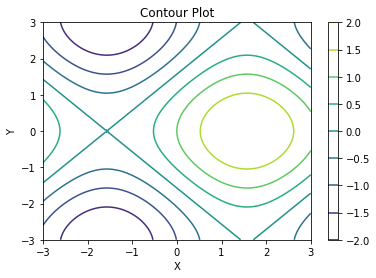

In [70]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + np.cos(Y)

# Create contour plot
plt.contour(X, Y, Z)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot')
plt.colorbar()  # Add color bar to show the scale
plt.show()

# Modelling for HCF filled with noble gas

Equation 22 of Markos paper will let us calculate the bulk refractive index of the gas in the fibre.  
$$ n^{2}_{gas} - 1 = Re(\chi_{e}) =  \sum_{t}^{} \frac{N_{t}}{N_{t,0}}Re(\chi_{t,e})  $$  
Or can use this equation from Borzsonyi 2008 paper:  
$$ n^{2}(\lambda,p,T) - 1 = \frac{p}{p_{0}}\frac{T_{0}}{T} [\frac{B_{1}\lambda^{2}}{\lambda^{2}-C_{1}} + \frac{B_{2}\lambda^{2}}{\lambda^{2}-C_{2}}] $$